[출처](https://www.datamanim.com/dataset/ADPpb/00/24.html)

# 머신러닝
## 1. 데이터 확인 및 전처리

**데이터 설명**

- 성별(sex) 바이너리 : ‘F’ - 여성 또는 ‘M’ - 남성

- 나이(age) 숫자: 15 - 22

- 부모님동거여부 (Pstatus) 바이너리: T: 동거 또는 ‘A’: 별거

- 엄마학력(Medu) 숫자 : 0 : 없음, 1 : 초등 교육, 2 : 5-9학년, 3 - 중등 교육 또는 4 - 고등 교육

- 아빠학력(Fedu) 숫자 : 0 : 없음, 1 : 초등 교육, 2 : 5-9학년, 3 - 중등 교육 또는 4 - 고등 교육

- 주보호자(guardian) 명목형 : ‘어머니’, ‘아버지’ 또는 ‘기타’

- 등하교시간(traveltime) 숫자 : 1 : 15분이하, 2 : 15 - 30분, 3 : 30분 - 1시간, 4 : 1시간 이상

- 학습시간(studytime) 숫자 : 1 : 2시간이하, 2 : 2-5시간, 3 : 5-10시간, 4 : 10시간이상

- 학고횟수(failures) 숫자 : 1, 2, 3 else 4

- 자유시간(freetime) 숫자 : 1(매우 낮음), 2, 3, 4, 5(매우 높음)

- 가족관계(famrel) 숫자 : 1(매우 나쁨), 2, 3, 4, 5(우수)

### 1.1 데이터 EDA 및 시각화

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False

df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/24/problem1.csv')
display(df.head())
print(df.shape)

,sex,age,Pstatus,Fedu,Medu,guardian,studytime,traveltime,failures,famrel,freetime,absences
0,F,18.0,A,4,4,mother,2,2.0,0,4,3.0,6
1,F,17.0,T,1,1,father,2,1.0,0,5,3.0,4
2,F,15.0,T,1,1,mother,2,1.0,3,4,3.0,10
3,F,15.0,T,2,4,mother,3,1.0,0,3,2.0,2
4,F,NaN,T,3,3,father,2,1.0,0,4,3.0,4


(395, 12)


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sex         395 non-null    object 
 1   age         392 non-null    float64
 2   Pstatus     395 non-null    object 
 3   Fedu        395 non-null    int64  
 4   Medu        395 non-null    int64  
 5   guardian    395 non-null    object 
 6   studytime   395 non-null    int64  
 7   traveltime  392 non-null    float64
 8   failures    395 non-null    int64  
 9   famrel      395 non-null    int64  
 10  freetime    390 non-null    float64
 11  absences    395 non-null    int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 37.2+ KB


In [3]:
df.isna().sum()

sex           0
age           3
Pstatus       0
Fedu          0
Medu          0
guardian      0
studytime     0
traveltime    3
failures      0
famrel        0
freetime      5
absences      0
dtype: int64

In [4]:
# 중복 데이터 행 개수
df.duplicated().sum()

0

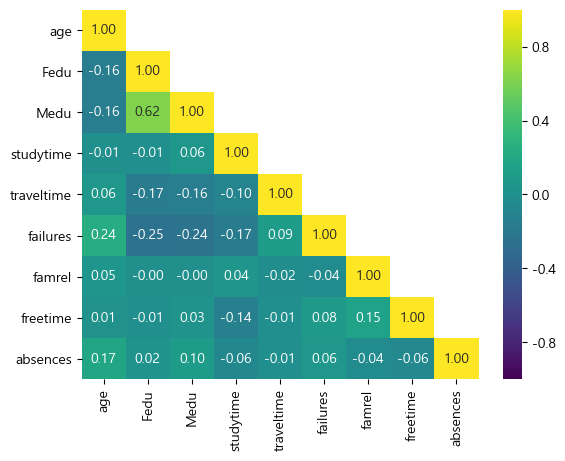

In [5]:
# 상관행렬 히트맵
df_corr = df.corr()
up_mask = np.triu(np.ones(df_corr.shape), k=1).astype(np.bool_)
sns.heatmap(df_corr, vmax=1, vmin=-1, annot=True, fmt='.2f', cmap='viridis', mask=up_mask)
plt.show()

In [104]:
# # 종속변수 분포
# plt.figure(figsize=(6,4))
# plt.bar(df['absences'].value_counts().index, df['absences'].value_counts().values)
# plt.title('absences 분포');

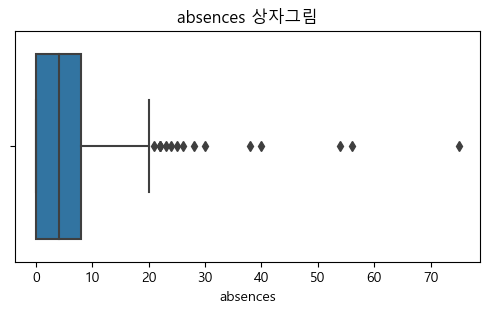

In [105]:
# 종속변수 상자그림
plt.figure(figsize=(6,3))
sns.boxplot(data=df, x='absences')
plt.title('absences 상자그림');

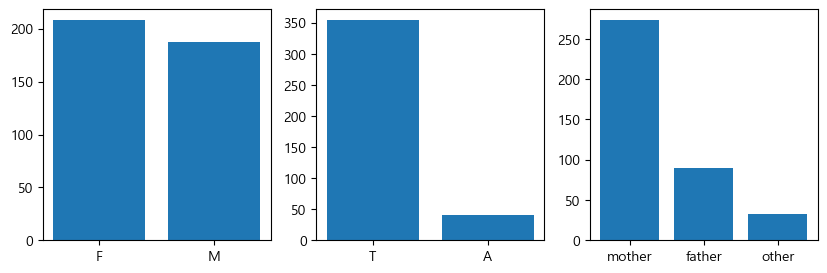

In [7]:
# 범주형 변수 개수 파악
fig, ax = plt.subplots(nrows=1,ncols=3, figsize=(10, 3))
ax[0].bar(df['sex'].value_counts().index, df['sex'].value_counts().values)
ax[1].bar(df['Pstatus'].value_counts().index, df['Pstatus'].value_counts().values)
ax[2].bar(df['guardian'].value_counts().index, df['guardian'].value_counts().values);

[해석]
1. 결측치 존재 여부
    - age, traveltime, freetime 변수에서 총 3개의 결측치가 발견되었고, float 형태이므로 평균 및 중앙값으로 대체하거나 KNN을 사용할 수 있을 것임.
1. 데이터 타입
    - object 형은 sex, guardian, Pstatus이고, 종속변수를 포함한 나머지 변수는 object와 float 형으로 구성되어 있음.
1. 종속변수와 독립변수의 상관관계
    - 종속변수 absences와의 상관관계를 살펴보았을 때, 수치형 변수에는 큰 상관성이 없었음.
1. 독립변수 상관관계
    - 다중공선성을 걱정할 만큼 독립변수끼리의 상관성이 큰 관계는 보이지 않았지만 Medu와 Fedu의 상관관계(0.62)가 상대적으로 높으므로 주의할 필요가 있을 것임.
1. 종속변수 분포
    - 종속변수 absences 상자그림을 확인한 결과 몇몇의 이상치가 존재함을 확인하였고, 왼쪽으로 치우쳐진 분포임을 알 수 있음.

### 1.2 결측치 처리 및 변화 시각화, 추가 전처리가 필요하다면 이유와 기대효과를 설명하라
[해석]
- 총 3개의 변수에서 결측치가 관측되었는데, float형인 age는 평균값으로 object형인 traveltime과 freetime은 최빈값으로 대체함.
- 결측치 개수 변화를 막대그래프로 시각화하였으며 적은 수의 결측치가 있었기에 막대그래프만으로 변화를 파악하기 어려워 결측치 대체 전과 후의 값 개수를 value_counts() 함수로 비교하였음.
- 하지만 단순히 해당 변수의 대표값으로 결측치를 대체하기보다는 다른 변수 값도 고려하여 결측치를 대체하는 방법도 있을 것임.
- 예를 들어 성별이 'F'이고 age가 20인 사람의 freetime이 결측값일 때, sex=F, age=20인 사람들의 freetime 최빈값으로 결측값을 대체할 수 있을 것임.
- 이처럼 다른 변수값도 고려하여 결측치를 대체한다면 데이터의 안정성을 상대적으로 확보할 수 있을 것이라 판단함.

<결측치 대체 전 age>
16.0    102
17.0     97
15.0     82
18.0     82
19.0     24
20.0      3
21.0      1
22.0      1
Name: age, dtype: int64 

<결측치 대체 후 age>
16.0    102
17.0    100
15.0     82
18.0     82
19.0     24
20.0      3
21.0      1
22.0      1
Name: age, dtype: int64


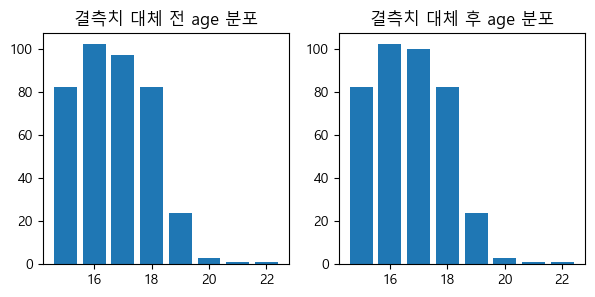

In [8]:
df1 = df.copy()
print('<결측치 대체 전 age>')
print(df['age'].value_counts(),'\n')

# 평균값으로 결측치 대체
df1.loc[df1['age'].isna(), 'age'] = round(np.mean(df1['age']))

print('<결측치 대체 후 age>')
print(df1['age'].value_counts())

fig, ax = plt.subplots(1,2, figsize=(7, 3))
ax[0].bar(df['age'].value_counts().index, df['age'].value_counts().values)
ax[0].set_title('결측치 대체 전 age 분포')

ax[1].bar(df1['age'].value_counts().index, df1['age'].value_counts().values)
ax[1].set_title('결측치 대체 후 age 분포');

<결측치 대체 전 traveltime>
1.0    255
2.0    107
3.0     22
4.0      8
Name: traveltime, dtype: int64 

<결측치 대체 후 traveltime>
1.0    258
2.0    107
3.0     22
4.0      8
Name: traveltime, dtype: int64


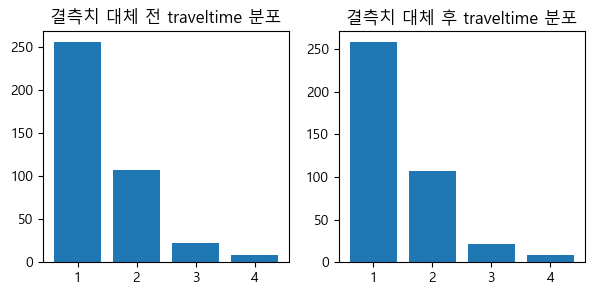

In [9]:
print('<결측치 대체 전 traveltime>')
print(df['traveltime'].value_counts(),'\n')

# 최빈값으로 결측치 대체
df1.loc[df1['traveltime'].isna(), 'traveltime'] = 1

print('<결측치 대체 후 traveltime>')
print(df1['traveltime'].value_counts())

fig, ax = plt.subplots(1,2, figsize=(7, 3))
ax[0].bar(df['traveltime'].value_counts().index, df['traveltime'].value_counts().values)
ax[0].set_title('결측치 대체 전 traveltime 분포')

ax[1].bar(df1['traveltime'].value_counts().index, df1['traveltime'].value_counts().values)
ax[1].set_title('결측치 대체 후 traveltime 분포');

<결측치 대체 전 freetime>
3.0    153
4.0    115
2.0     64
5.0     39
1.0     19
Name: freetime, dtype: int64 

<결측치 대체 후 freetime>
3.0    158
4.0    115
2.0     64
5.0     39
1.0     19
Name: freetime, dtype: int64


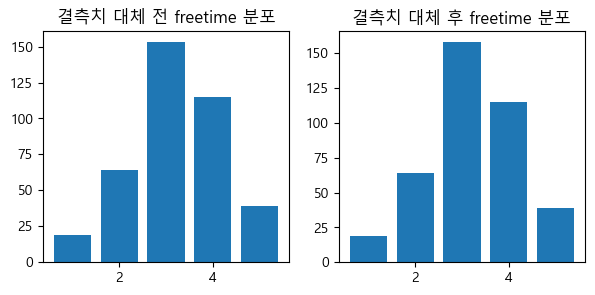

In [10]:
print('<결측치 대체 전 freetime>')
print(df['freetime'].value_counts(),'\n')

# 최빈값으로 결측치 대체
df1.loc[df1['freetime'].isna(), 'freetime'] = 3

print('<결측치 대체 후 freetime>')
print(df1['freetime'].value_counts())

fig, ax = plt.subplots(1,2, figsize=(7, 3))
ax[0].bar(df['freetime'].value_counts().index, df['freetime'].value_counts().values)
ax[0].set_title('결측치 대체 전 freetime 분포')

ax[1].bar(df1['freetime'].value_counts().index, df1['freetime'].value_counts().values)
ax[1].set_title('결측치 대체 후 freetime 분포');

In [11]:
df1.isna().sum()

sex           0
age           0
Pstatus       0
Fedu          0
Medu          0
guardian      0
studytime     0
traveltime    0
failures      0
famrel        0
freetime      0
absences      0
dtype: int64

### 1.3 결석일수 예측모델을 2개 제시하고 선택한 근거 설명
[해석]
- 본 분석에는 SVM, XGBoost 모델을 사용함.
- 두 모델은 분류 문제뿐만 아니라 회귀 문제에도 적용이 가능하고, SVM 모델은 오차가 적고, 모델 예측 성능이 좋기 때문에 선택함.
- XGBoost 모델은 부스팅 앙상블 기법으로 예측력이 약한 모형들을 결합해 강한 예측 모델을 만들고, 병렬 처리하여 학습 속도가 빠르기 때문에 선택함.

### 1.4 선정한 모델 2가지 생성 및 모델의 평가 기준을 선정하고 선정 이유 설명

In [109]:
# 범주형 변수를 더미 변수로 변환
df2 = pd.get_dummies(data=df1, columns=['sex', 'Pstatus', 'Fedu', 'Medu', 'guardian', 
                                  'studytime', 'traveltime', 'failures', 'freetime'], drop_first=True)
df2.head()

,age,famrel,absences,sex_M,Pstatus_T,Fedu_1,Fedu_2,Fedu_3,Fedu_4,Medu_1,...,traveltime_2.0,traveltime_3.0,traveltime_4.0,failures_1,failures_2,failures_3,freetime_2.0,freetime_3.0,freetime_4.0,freetime_5.0
0,18.0,4,6,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
1,17.0,5,4,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,15.0,4,10,0,1,1,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
3,15.0,3,2,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,17.0,4,4,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [111]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.compose import ColumnTransformer

X = df2.drop(columns=['absences'], axis=1)
y = df2.absences
# X = df1.drop(columns=['absences'], axis=1)
# y = df1.absences

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# numeric_feature = ['age']
# categorical_feature = ['sex', 'Pstatus', 'Fedu', 'Medu', 'guardian', 'studytime',
#        'traveltime', 'failures', 'famrel', 'freetime']

# column_transformer = ColumnTransformer([
#     ('num', StandardScaler(), numeric_feature),
#     ('cat', OneHotEncoder(sparse = False, handle_unknown='ignore'), categorical_feature)
# ])

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train[['age', 'famrel']])
X_train.loc[:, 'age':'famrel'] = X_train_sc
display(X_train.head())

X_test_sc = scaler.transform(X_test[['age', 'famrel']])
X_test.loc[:, 'age':'famrel'] = X_test_sc
display(X_test.head())

(276, 27)
(119, 27)
(276,)
(119,)


C:\Users\user\anaconda3\envs\adp_code\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,age,famrel,sex_M,Pstatus_T,Fedu_1,Fedu_2,Fedu_3,Fedu_4,Medu_1,Medu_2,...,traveltime_2.0,traveltime_3.0,traveltime_4.0,failures_1,failures_2,failures_3,freetime_2.0,freetime_3.0,freetime_4.0,freetime_5.0
59,-0.539180,0.012259,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
337,0.282995,0.012259,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
23,-0.539180,1.140125,1,1,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
88,-0.539180,0.012259,1,1,0,1,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
335,0.282995,0.012259,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


C:\Users\user\anaconda3\envs\adp_code\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,age,famrel,sex_M,Pstatus_T,Fedu_1,Fedu_2,Fedu_3,Fedu_4,Medu_1,Medu_2,...,traveltime_2.0,traveltime_3.0,traveltime_4.0,failures_1,failures_2,failures_3,freetime_2.0,freetime_3.0,freetime_4.0,freetime_5.0
188,0.282995,-1.115606,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
365,1.105171,-1.115606,1,1,0,0,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
190,-0.539180,0.012259,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
353,1.927346,0.012259,1,1,1,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
166,-0.539180,0.012259,1,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [120]:
# # SVR
# from sklearn.pipeline import Pipeline
# svr = Pipeline([('preprocesser', column_transformer),
#                ('model', SVR())])
# svr.fit(X_train, y_train)
# pred = svr.predict(X_test)

# print('테스트 점수: ', svr.score(X_test, y_test))
# rmse = np.sqrt(mean_squared_error(y_test, pred))
# print('RMSE: ',rmse)

In [119]:
# # XGBoost
# from sklearn.pipeline import Pipeline
# xgb = Pipeline([('preprocesser', column_transformer),
#                ('model', XGBRegressor())])
# xgb.fit(X_train, y_train)
# pred = xgb.predict(X_test)

# print('테스트 점수: ', xgb.score(X_test, y_test))
# rmse = np.sqrt(mean_squared_error(y_test, pred))
# print('RMSE: ',rmse)

In [117]:
# SCR
svr = SVR()
svr.fit(X_train, y_train)

pred = svr.predict(X_test)

print('테스트 점수: ', svr.score(X_test, y_test))
rmse = np.sqrt(mean_squared_error(y_test, pred))
print('RMSE: ',rmse)

테스트 점수:  -0.09310586335977145
RMSE:  7.555857803405392


In [118]:
# xgboost
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

pred = xgb.predict(X_test)

print('테스트 점수: ', xgb.score(X_test, y_test))
rmse = np.sqrt(mean_squared_error(y_test, pred))
print('RMSE: ',rmse)

테스트 점수:  -0.41781258124278353
RMSE:  8.605221966414982


[해석]
- SVR, XGBoost 모두 테스트 점수 값이 음수가 나왔음. 이는 모델의 예측 성능이 좋지 않다는 것을 의미함.
- RMSE를 모델 평가 기준으로 선정한 이유는 직관적이며, 잔차를 제곱하고 다 더한 뒤 루트를 씌웠기 때문에 큰 오류값에 패널티를 크게 주는 이점이 있기 때문임.
    - RMSE는 잔차 제곱합에 루트를 씌운 것으로 MSE에 루트를 적용한 것과 같음.
- RMSE 값을 비교하면 SVR 모델의 RMSE 값이 더 낮은 것을 알 수 있음.

### 1.5 모델이 다양한 일상 상황에서도 잘 동작한다는 것을 설명하고 시각화 하라

[해석]
- ...

### 1.6 모델 최적화 방안에 대해 구체적으로 설명하라
[해석]
1. 파생변수 생성
    - Medu 변수와 Fedu 변수 간 상관관계가 약 0.62으로 독립변수 간 가장 높은 상관성을 보이는데, 두 개 변수들을 대신할 수 있는 새로운 파생변수를 생성하여 다중공선성 문제를 피할 수 있음.
1. 그리드서치 진행
    - 교차검증과 하이퍼 파라미터 튜닝을 동시에 진행하는 그리드 서치를 수행하여 모델의 성능을 더 높일 수 있을 것으로 판단함.
    - 하지만 사용하는 모델과 하이퍼 파라미터마다 수행 속도에 차이가 발생하므로 이 점을 고려하여 진행해야 함.
1. 종속변수 이상치 처리
    - 본 분석에서는 종속변수의 이상치를 별도로 처리하지 않았음.
    - 이상치는 모델 성능에 영향을 미치는 주요인 중 하나이므로 현업의 분석가들과 회의를 통해 상자그림으로 도출된 값들이 이상치인지, 아니면 자연스럽게 발생할 수 있는 값인지(=이상치가 아닌지)를 확인해야 함.
1. 연속형 변수 스케일링
    - 본 분석에서는 StandardScaler를 이용하여 스케일링을 수행하였지만, MinMAxScaler, MaxAbsScaler, RobustScaler 등 다양한 방식의 장단점을 고려하여 변수 전처리를 수행할 수 있음.

# 통계분석
## 2. 광고횟수와 광고비에 따른 매출액의 데이터이다

### 2.1 광고비 변수를 가변수 처리후 다중회귀를 수행하여 회귀계수가 유의한지 검정

In [121]:
import pandas as pd

df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/24/problem2.csv',encoding='cp949')
df.head()

,광고횟수,광고비,매출액
0,2,낮음,15
1,3,낮음,16
2,4,낮음,17
3,4,높음,18
4,5,높음,20


In [130]:
df1 = pd.get_dummies(data=df, columns = ['광고비'], drop_first=True)
df1.head()

,광고횟수,매출액,광고비_높음
0,2,15,0
1,3,16,0
2,4,17,0
3,4,18,1
4,5,20,1


In [133]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

model = smf.ols(formula = '매출액 ~ 광고횟수 + 광고비_높음', data=df1)
result = model.fit()
result.summary()

C:\Users\user\anaconda3\envs\adp_code\lib\site-packages\scipy\stats\stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    매출액   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     221.2
Date:                Wed, 21 Jun 2023   Prob (F-statistic):           9.96e-08
Time:                        17:36:55   Log-Likelihood:                -11.883
No. Observations:                  11   AIC:                             29.77
Df Residuals:                       8   BIC:                             30.96
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.1641      0.556     21.876      0.000      10.882      13.446
광고횟수           1.4350      0.074     19.518      0.000       1.265       1.605
광고비_높음         0.5227      0.536      0.975      0.358      -0.713       1.759
==============================================================================
Omnibus:                        7.665   Durbin-Watson:                   0.919
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                3.407
Skew:                           1.265   Prob(JB):                        0.182
Kurtosis:                       4.015   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

[해석]
1. 광고횟수
    - 귀무가설: 광고횟수의 회귀계수는 유의하지 않다.
    - 대립가설: 광고횟수의 회귀계수는 유의하다.
    - p-value < 0.05보다 작으므로 회귀계수는 유의수준 0.05하에서 통계적으로 유의하다고 할 수 있음.
2. 광고비_높음
    - 귀무가설: 광고비_높음의 회귀계수는 유의하지 않다.
    - 대립가설: 광고비_높음의 회귀계수는 유의하다.
    - p-value > 0.05보다 작으므로 회귀계수는 유의수준 0.05하에서 통계적으로 유의하다고 할 수 없음.

### 2.2 회귀식이 유의한지 판단
[해석]
- 회귀식의 유의성 검정은 F-통계량의 그의 p-value 값을 통해서 판단할 수 있음.
- 귀무가설: 회귀식은 유의하지 않다.
- 대립가설: 회귀식은 유의하다.
- p-value < 0.05 이므로 도출된 회귀식은 유의수준 0.05 하에서 유의하다고 할 수 있음.

## 3. A생산라인의 제품 평균은 5.7mm이고 표준편차는 0.03, B생산라인의 제품 평균은 5.6mm이고 표준편차는 0.04라면 5%유의수준으로 두 제품의 평균이 차이가 있는지 여부를 검정하기 Z(0.05) = 1.65

### 3.1 귀무가설과 대립가설을 세워라
- 귀무가설: 두 제품의 평균에 차이가 없다.
- 대립가설: 두 제품의 평균에 차이가 있다.

### 3.2 두 평균이 차이가 있는지 검정하라

In [137]:
a_mean = 5.7
a_s = 0.03
m = 80
b_mean = 5.6
b_s = 0.04
n = 90
alpha = .05

z = (a_mean - b_mean) / np.sqrt( (a_s**2/m) + (b_s**2/n) )
z

18.560646746692477

[해석]
- Z값이 1.65보다 크므로 귀무가설을 기각하여 두 제품의 평균에 차이가 있다고 할 수 있음.

## 4. 바이러스 감염 분류표를 보고 베이지안 분류 방법을 사용해 양성으로 예측된 사람이 실제로 양성일 확률을 구하라
[해석]  
P(실제 양성 | 양성 예측) 

= P(실제 양성 Π 양성 예측) / P(양성 예측)  

= P(실제 양성) * P(양성 예측 | 실제 양성) / { P(실제 양성) * P(양성 예측 | 실제 양성) + P(실제 음성) * P(양성 예측 | 실제 음성)}

In [2]:
table = pd.DataFrame({'양성(실제)':[370, 15],
                     '음성(실제)':[10, 690]},
                    index = ['양성(예측)', '음성(예측)'])
table

,양성(실제),음성(실제)
양성(예측),370,10
음성(예측),15,690


In [13]:
fact_positive = (370 + 15) / (370 + 15+ 10 + 690)
fact_negative = (10 + 690) / (370 + 15+ 10 + 690)

fact_positive_intersection_pred_positive = 370 / (370 + 15+ 10 + 690) # P(실제 양성 Π 양성 예측)
pred_positive_condition_fact_positive = fact_positive_intersection_pred_positive / fact_positive # P(양성 예측 | 실제 양성)

pred_positive_intersection_fact_negative = 10 / (370 + 15+ 10 + 690) # P(양성 예측 Π 실제 음성)
pred_positive_condition_fact_negative = pred_positive_intersection_fact_negative / fact_negative # P(양성 예측 | 실제 음성)

# 분모
## { P(실제 양성) * P(양성 예측 | 실제 양성) + P(실제 음성) * P(양성 예측 | 실제 음성)}
mon = (pred_positive_condition_fact_positive * fact_positive) + (pred_positive_condition_fact_negative * fact_negative)

# 분자
## P(실제 양성) * P(양성 예측 | 실제 양성)
son = fact_positive * pred_positive_condition_fact_positive # 분자

prob = son / mon
prob

0.9736842105263157

## 5. 주어진 데이터에서 신뢰구간을 구하려한다

#### 정규분포에서 표폰을 추출함[Z(0.05) = -1.65 , Z(0.025) = -1.96, T(0.05, 8) = 1.860 , T0.025(0.025, 8) = 2.306]
#### 데이터(9개) : [3.1, 3.3, 3.5, 3.7, 3.9, 4.1, 4.3, 4.4, 4.7]

### 5.1 모분산을 모르는 경우 주어진 데이터의 95% 신뢰구간을 구하라
[해석]
- 정규분포이며, 표본의 크기가 작고 모분산을 모르므로 t분포를 이용한 신뢰구간을 구해야 함.

In [25]:
data = [3.1, 3.3, 3.5, 3.7, 3.9, 4.1, 4.3, 4.4, 4.7]
import scipy.stats as stats
print('신뢰구간:', stats.t.interval(alpha=0.95, loc=np.mean(data), df = len(data)-1, scale= stats.sem(data)))

신뢰구간: (3.4777333086019713, 4.300044469175806)


### 5.2 sigma = 0.04인걸 알고 있을때의 95% 신뢰구간을 구하라
- 정규분포이며, 모분산이 주어졌으므로 z분포를 이용한 신뢰구간을 구해야 함.

In [2]:
data = [3.1, 3.3, 3.5, 3.7, 3.9, 4.1, 4.3, 4.4, 4.7]
import scipy.stats as stats
import numpy as np
print('신뢰구간:', stats.norm.interval(alpha=0.95, loc=np.mean(data), scale= 0.04/np.sqrt(len(data))))

신뢰구간: (3.862756035761688, 3.9150217420160898)
